<div dir="rtl">
    
# פרוייקט גמר- ניתוח נתונים

<div dir="rtl">

## קבוצה מספר -2 ,"Affairs Data"- שם הדאטה


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

<div dir="rtl">

#### מגישים:

   ### נועם שייר, אריאל בבא והילה הלוי


<div dir="rtl">
    
    קישור למקור ממנו לקחנו את הנתונים:
   

https://www.kaggle.com/datasets/utkarshx27/fairs-extramarital-affairs-data

<div> 
<img src='https://github.com/noamshayer/DataAnalistProject/blob/main/open_p.jpg?raw=true'>
</div>


<div dir="rtl">

###  רקע על הדאטה
    בעבודה זו נחקור את הגורמים אשר משפיעים על אנשים לנהל רומן באמצעות התכונות אשר מופיעות בדאטה.
   

In [2]:
url = 'https://raw.githubusercontent.com/noamshayer/DataAnalistProject/main/Affairs.csv'
affairs_df = pd.read_csv(url)


In [3]:
del affairs_df[affairs_df.columns[0]]


In [4]:
affairs_df['index'] = range(0, len(affairs_df))
new_affairs=affairs_df.copy(deep=True)


In [5]:
new_affairs['age']=new_affairs['age'].astype(str)
new_affairs['yearsmarried']=new_affairs['yearsmarried'].astype(str)
new_affairs['affairs']=new_affairs['affairs'].astype(str)
new_affairs['education']=new_affairs['education'].astype(str)
new_affairs['rating']=new_affairs['rating'].astype(str)
new_affairs['occupation']=new_affairs['occupation'].astype(str)
new_affairs['religiousness']=new_affairs['religiousness'].astype(str)


In [6]:
new_affairs['age']=new_affairs['age'].replace({"37.0":"35-39","17.5":"Under 20","22.0":"20-24","27.0":"25-29","32.0":"30-34","42.0":"40-44","47.0":"45-49","52.0":"50-54","57.0":"55+"})
new_affairs['affairs']=new_affairs['affairs'].replace({"0":"none","1":"once","2":"twice","3":"3 times","7":"4-10 times","12":"monthly, weekly or daily"})
new_affairs['yearsmarried']=new_affairs['yearsmarried'].replace({"0.125":"3 months or less","0.417":"4-6 months","0.75":"6 months-1 year","1.5":"1-2 years","4.0":"3-5 years","7.0":"6-8 years","10.0":"9-11 years","15.0":"12+ years"})
new_affairs['religiousness']=new_affairs['religiousness'].replace({"1":"anti","2":"not at all","3":"slightly","4":"somewhat","5":"very"})
new_affairs['education']=new_affairs['education'].replace({"9":"grade school","12":"high school graduate","14":"some college","16":"college graduate","17":"some graduate work","18":"master's degree","20":"advanced degree"})
new_affairs['rating']=new_affairs['rating'].replace({"1":"very unhappy","2":"somewhat unhappy","3":"average","4":"happier than average","5":"very happy"})
#new_affairs


<div dir="rtl">
    
    יצרנו עותק לטבלה המקורית, עליה ביצענו שינויים כדי שנוכל להציג את הנתונים הכלליים של הדאטה בצורה ברורה ומפורטת.

<div dir="rtl">

### בדיקת ערכים חסרים

In [7]:
new_affairs.isnull().sum().sort_values(ascending=False)

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
index            0
dtype: int64

<div dir="rtl">

    ניתן לראות כי אין ערכים חסרים, ולכן לא נבצע שינויים בדאטה.

<div dir="rtl">


### הצגת הדאטה בצורה ויזואלית  

In [8]:
features=["affairs","gender","age","yearsmarried","children","religiousness","education","occupation","rating"]

In [9]:
melt_affairs=new_affairs.melt(id_vars="index",value_vars=features)


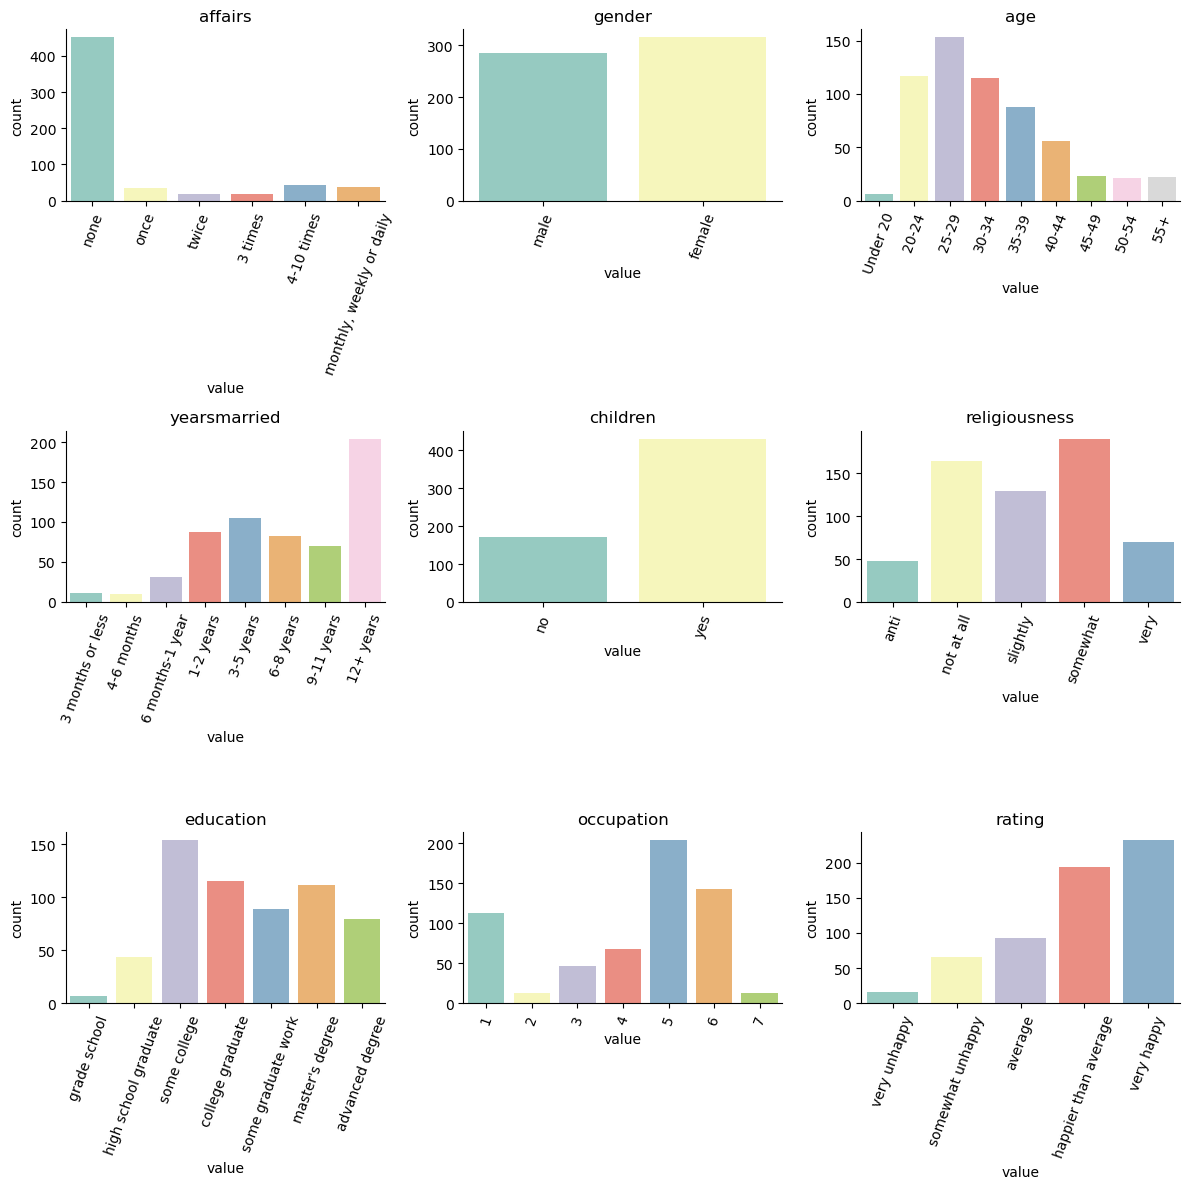

In [10]:
x_orders = {
    'affairs': ['none', 'once', 'twice', '3 times', '4-10 times', 'monthly, weekly or daily'],
    'gender': ['male', 'female'],
    'age': ['Under 20', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55+'],
    'yearsmarried': ['3 months or less', '4-6 months', '6 months-1 year', '1-2 years', '3-5 years', '6-8 years', '9-11 years', '12+ years'],
    'children': ['no', 'yes'],
    'religiousness': ['anti', 'not at all', 'slightly', 'somewhat', 'very'],
    'education': ['grade school', 'high school graduate', 'some college', 'college graduate', 'some graduate work', "master's degree", 'advanced degree'],
    'occupation': ['1', '2', '3', '4', '5', '6', '7'],
    'rating': ['very unhappy', 'somewhat unhappy', 'average', 'happier than average', 'very happy']
}
affairs_histplots = sns.FacetGrid(melt_affairs, col="variable", hue="variable", col_wrap=3, sharex=False, sharey=False, height=4)

for ax, variable in zip(affairs_histplots.axes.flat, affairs_histplots.col_names):
    if variable in x_orders:
        ordered_data = melt_affairs.loc[melt_affairs['variable'] == variable].sort_values('value')
        ordered_categories = ordered_data['value'].unique()

        sns.countplot(data=ordered_data, x='value', ax=ax, order=x_orders[variable], palette='Set3')
        ax.set_xticklabels(x_orders[variable], rotation=70)
        ax.set_title(variable)
plt.tight_layout()
plt.show()


<div dir="rtl">


### הצגת הקורולציה  

In [11]:
features=["affairs","gender","age","yearsmarried","children","religiousness","education","occupation","rating"]

In [12]:
affairs_dummies = pd.get_dummies(affairs_df[features])


In [13]:
correlation_matrix = affairs_dummies.corr().round(2)


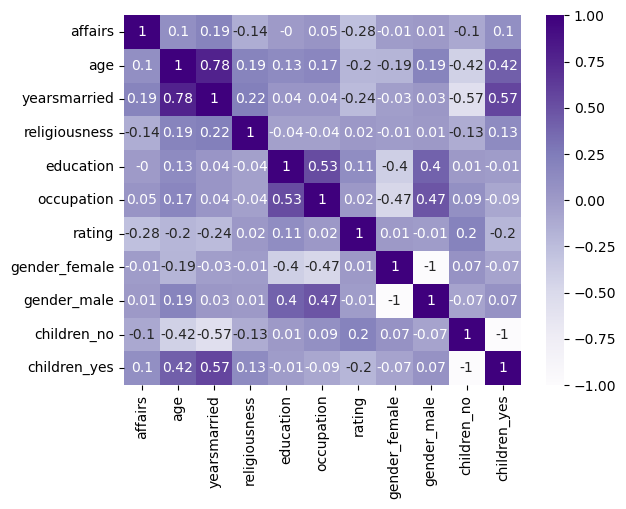

In [14]:
sns.heatmap(data=correlation_matrix,cmap='Purples', annot=True)
plt.show()


<div dir="rtl">

    ניתן לראות כי לא מצאנו קורולציה משמעותית שתעזור לנו לבחון איזה קריטריון ישפיע על קיומו של רומן.


In [15]:
yes_no_affairs=affairs_df.copy(deep=True)


In [16]:
yes_no_affairs['gender']=yes_no_affairs['gender'].astype(str)
yes_no_affairs['age']=yes_no_affairs['age'].astype(str)
yes_no_affairs['yearsmarried']=yes_no_affairs['yearsmarried'].astype(str)
yes_no_affairs['affairs']=yes_no_affairs['affairs'].astype(str)
yes_no_affairs['education']=yes_no_affairs['education'].astype(str)
yes_no_affairs['rating']=yes_no_affairs['rating'].astype(str)
yes_no_affairs['occupation']=yes_no_affairs['occupation'].astype(str)
yes_no_affairs['religiousness']=yes_no_affairs['religiousness'].astype(str)


In [17]:
yes_no_affairs['gender']=yes_no_affairs['gender'].replace({'male':0,'female':1})
yes_no_affairs['children']=yes_no_affairs['children'].replace({'no':0,'yes':1})
yes_no_affairs['age']=yes_no_affairs['age'].replace({"37.0":"35-39","17.5":"Under 20","22.0":"20-24","27.0":"25-29","32.0":"30-34","42.0":"40-44","47.0":"45-49","52.0":"50-54","57.0":"55+"})
yes_no_affairs['affairs']=yes_no_affairs['affairs'].replace({"0":"no","1":"yes","2":"yes","3":"yes","7":"yes","12":"yes"})
yes_no_affairs['yearsmarried']=yes_no_affairs['yearsmarried'].replace({"0.125":"0.25"})
yes_no_affairs['education']=yes_no_affairs['education'].replace({"9":"grade school","12":"high school graduate","14":"some college","16":"college graduate","17":" some graduate work","18":"master's degree","20":"advanced degree"})


<div dir="rtl">


## מסקנה 1- מגדר
    ראשית, נרצה לראות האם יש קשר בין המגדר של האדם ובין בחירתו לנהל רומן.
    שאלנו את השאלה: האם גברים מנהלים רומן יותר מנשים? ואולי נשים מנהלות רומן יותר מגברים?
    

In [18]:
column_gender_general=new_affairs['gender'].value_counts()


In [19]:
new_affairs2=new_affairs.copy(deep=True)


In [20]:
new_affairs2['affairs']=new_affairs2['affairs'].replace({'none':'No affair',"once":'yes affair',"twice":'yes affair',"3 times":'yes affair',"4-10 times":'yes affair',"monthly, weekly or daily":'yes affair'})

In [21]:
column_women_affairs=new_affairs2[new_affairs2.gender=='female']['affairs'].value_counts()


In [22]:
column_men_affairs=new_affairs2[new_affairs2.gender!='female']['affairs'].value_counts()


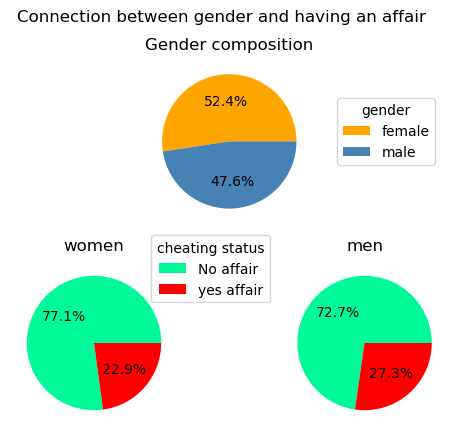

In [23]:
colors1= ['orange', 'steelblue']
colors2=['mediumspringgreen','red']
plt.subplot(2, 1, 1)
plt.pie(column_gender_general, colors=colors1 ,autopct='%1.1f%%')
plt.title('Gender composition')
plt.legend(column_gender_general.index, title="gender",bbox_to_anchor=(1.1, 0.8))

plt.subplot(2, 2, 3)
plt.pie(column_women_affairs,colors=colors2 ,autopct='%1.1f%%')
plt.title('women')
plt.legend(column_women_affairs.index, title="cheating status", bbox_to_anchor=(0.8, 0.7))

plt.subplot(2, 2, 4)
plt.pie(column_men_affairs,colors=colors2 ,autopct='%1.1f%%')
plt.title('men')

plt.suptitle("Connection between gender and having an affair")
plt.show()

<div dir="rtl">

    ניתן לראות באיור העליון פילוג באחוזים של עוני הסקר- יותר נשים ענו מגברים.    
    כעת נתמקד באיורים התחתונים, האיורים הללו מפרטים לנו את אחוזי ניהול הרומנים עבור כל מגדר. 
    ואכן ניתן לראות כי קבוצת הגברים ניהלו רומן יותר מקבוצת הנשים אך ההפרש זניח ולא משמעותי.


    

<div dir="rtl">

## מסקנה 2- רמת אושר
    שנית, נרצה לבדוק מה הקשר בין ניהול רומנים למדד האושר בנישואים.

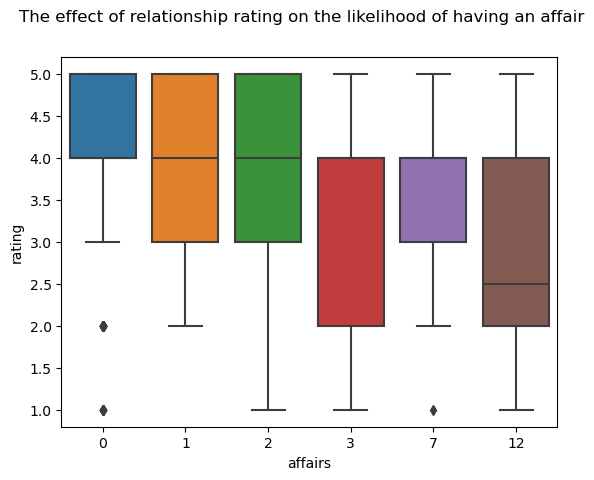

In [24]:
sns.boxplot(data = affairs_df, x = 'affairs', y = 'rating')
plt.suptitle("The effect of relationship rating on the likelihood of having an affair")
plt.show()

<div dir="rtl">
    
    באמצעות הבוקספלוט ניתן לראות כי אדם המנהל 0 רומנים, דירוג האושר שלו גבוה באופן יחסי.
    לעומת זאת, ככל שהאדם מנהל יותר רומנים, מידת האושר שלו תלך ותרד.
    

<div dir="rtl">

## מסקנה 3- ילדים

<div dir="rtl">
    
    במסקנה הזאת נבחן את מדד האושר אצל אנשים שניהלו רומן ויש להם ילדים, מול מדד האושר אצל אנשים שניהלו רומן ואין להם ילדים. 


## Is there a connection between children and having an affair? 


<div> 
<img src='https://github.com/noamshayer/DataAnalistProject/blob/main/before_kids.jpg?raw=true'>
</div>

In [25]:
new_affairs2['rating']=new_affairs2['rating'].replace({"very unhappy":1,"somewhat unhappy":2,"average":3,"happier than average":4,"very happy":5})
no_affairs=new_affairs2.loc[new_affairs2.affairs=="Did not cheat"]
only_affairs=new_affairs2.loc[new_affairs2.affairs!="Did not cheat"]


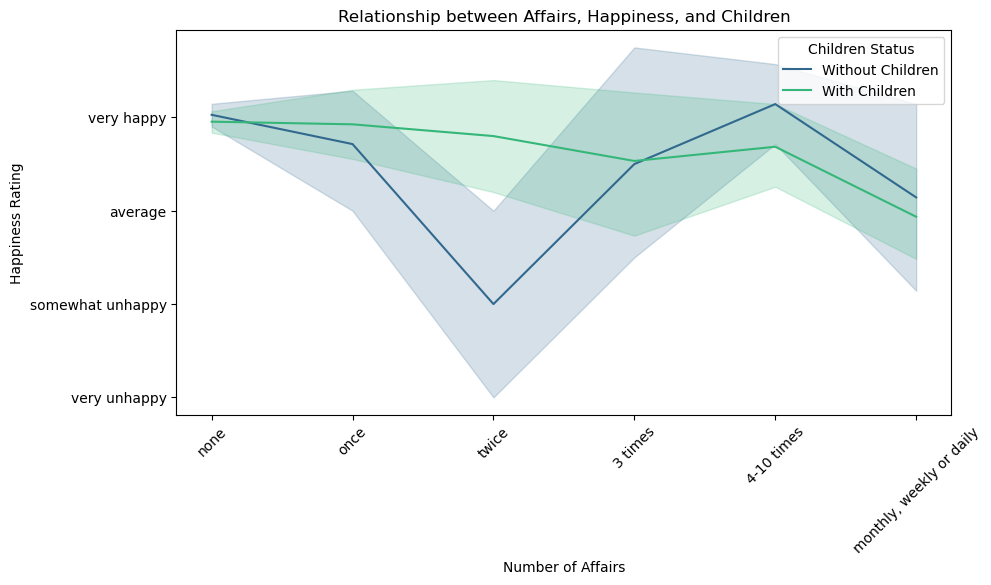

In [26]:
new_affairs["affairs"] = pd.Categorical(new_affairs["affairs"], categories=['none', 'once', 'twice', '3 times', '4-10 times', 'monthly, weekly or daily'], ordered=True)
new_affairs["has_children"] = new_affairs["children"].apply(lambda x: "With Children" if x == "yes" else "Without Children")

plt.figure(figsize=(10, 5))
sns.lineplot(x="affairs", y="rating", hue="has_children", data=new_affairs, palette="viridis")
x_ticks = range(len(new_affairs["affairs"].cat.categories))
x_tick_labels = new_affairs["affairs"].cat.categories

plt.gca().set_xticks(x_ticks)
plt.gca().set_xticklabels(x_tick_labels, rotation=45)

plt.title("Relationship between Affairs, Happiness, and Children")
plt.xlabel("Number of Affairs")
plt.ylabel("Happiness Rating")
plt.legend(title="Children Status", loc="upper right")

plt.show()


<div dir="rtl">
    
    כמו שראינו כבר במסקנה הקודמת - באופן כללי רמת האושר יורדת ככל שבוגדים יותר.
    כאן, חילקנו את המקרה למצב שבו יש ילדים ומצב שבו אין ילדים. 
    אנו רואים שבמצב שבו יש ילדים רמת האושר גבוהה יותר מאשר במצב שבוא אין ילדים ובאופן עיקבי רמת האושר יורדת ככל שמנהלים יותר רומנים. 
    בניגוד למי שאין לו ילדים - שרמת האושר שלו יורדת בהתחלה בצורה דרסטית מאוד, ובאופן מפתיע לאחר מכן ממוצע רמת האושר עולה, ואז שוב יורד בהדרגתיות. 

<div dir="rtl">
    
## מסקנה 4- שנות נישואים

    במסקנה  זו נבדוק את ההשפעה של משך שנות הנישואים של אדם על הסבירות לקיים רומן.

## Is there a connection between having an affair and years of marrige?


<div> 
<img src='https://github.com/noamshayer/DataAnalistProject/blob/main/honeymoon.jpg?raw=true'>
</div>

In [27]:
ym_df=affairs_df.copy(deep=True)

In [28]:
ym_df['affairs']=ym_df['affairs'].replace({0:0,3:1,7:1,12:1,1:1,2:1})

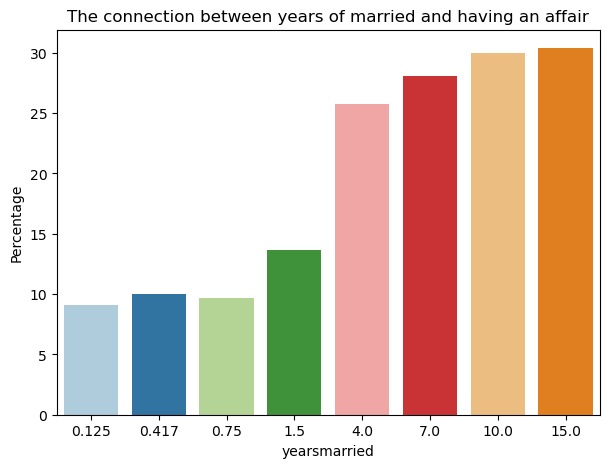

In [29]:
percentages = ym_df.groupby('yearsmarried')['affairs'].mean() * 100
order = ['3 months or less', '4-6 months', '6 months-1 year', '1-2 years', '3-5 years', '6-8 years', '9-11 years', '12+ years']
colors = sns.color_palette('Paired', len(percentages))

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=percentages.index, y=percentages.values,  palette=colors,)
ax.set(ylabel='Percentage', title='The connection between years of married and having an affair')
plt.show()

<div dir="rtl">
    
    0.125 = שלושה חודשים או פחות
    0.417 = ארבעה עד שישה חודשים
    0.75 = שישה חודשים עד שנה
    1.5 = שנה עד שנתיים
    4 = שלוש עד חמש שנים
    7 = שש עד שמונ שנים
    10 = תשע עד אחד עשרה שנים
    15 = יותר משתים עשרה שנים
    
    אפשר לראות מהגרף שככל שנשואים יותר שנים, כך גם מנהלים יותר רומנים.
    אנו רואים גם קפיצה משמעותית באחוז ניהול הרומנים בין שנה שנתיים לשלוש ומעלה שנים.

<div dir="rtl">
    
    ראשית נסביר שבחרנו לעצב את הגרף בצורה כזו שלכל נקודה יש צבע מסויים, וככל שצבע הנקודה כהה יותר זה אומר שיש שם יותר ערכים. 
    ניתן לראות מהגרף שמקבוצת האנשים שלא מנהלים רומן, יש את כל טווח שנות הנישואים. 
    לעומתם, ניתן לראות שבטווח זמן הנישואין הראשוני, עד שנה, ממש מעט מנהלים רומן. ואכן, ככל שנשואים יותר זמן רואים שיש יותר נקודות והן גם כהות יותר, כלומר אנשים מנהלים יותר רומנים. 
    כשמגיעים ל 12+ שנות נישואים רואים שתדירות ניהול הרומנים עולה בצורה דרסטית. 
    אך עם זאת, גם בקבוצת הנשואים מעל 12 שנים, רואים שהצבע הכהה ביותר הוא בקבוצת האנשים שלא מנהלים רומנים.
    לכן, המסקנה העיקרית שלנו היא שבתקופת "ירח דבש" כמעט ולא מנהלים רומן. וככל שנשואים יותר זמן, יש סבירות גבוהה יותר לנהל רומן.

<div dir="rtl">
    
## מסקנה 5- דת
    כעת, נרצה לדעת כיצד אמונה של אדם משפיעה על הסיכוי לנהל רומן ועל משך תדירותו.


<div> 
<img src='https://github.com/noamshayer/DataAnalistProject/blob/main/moses.png?raw=true'>
</div>

In [30]:
reg_affairs_df=new_affairs.copy(deep=True)

<Figure size 1000x500 with 0 Axes>

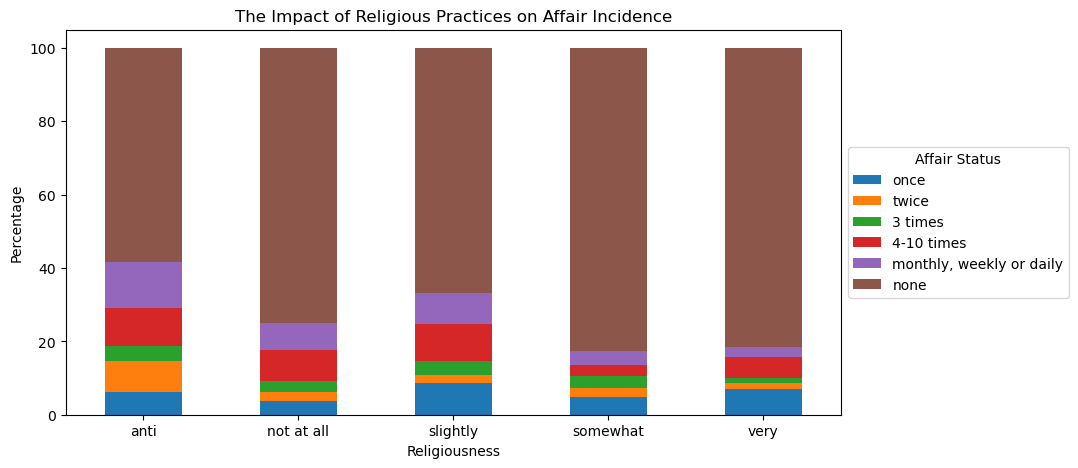

In [31]:
plt.figure(figsize=(10, 5))
reg_affairs_df["religiousness"] = pd.Categorical(reg_affairs_df["religiousness"], categories=['anti', 'not at all', 'slightly', 'somewhat', 'very'], ordered=True)
reg_affairs_df["affairs"] = pd.Categorical(reg_affairs_df["affairs"], categories=['once', 'twice', '3 times', '4-10 times', 'monthly, weekly or daily','none'], ordered=True)

total_per_category = reg_affairs_df.groupby('religiousness')['affairs'].count()
percentages = reg_affairs_df.groupby(['religiousness', 'affairs']).size().unstack(fill_value=0).div(total_per_category, axis=0) * 100

ax = percentages.plot(kind='bar', stacked=True, figsize=(10, 5))

x_ticks = range(len(reg_affairs_df["religiousness"].cat.categories))
plt.xticks(x_ticks, reg_affairs_df["religiousness"].cat.categories, rotation=0)
plt.ylabel('Percentage')
plt.xlabel('Religiousness')
plt.title("The Impact of Religious Practices on Affair Incidence")
plt.legend(title="Affair Status", bbox_to_anchor=(1, 0.5), loc="center left")

plt.show()


<div dir="rtl">
    
    באיור הנ"ל בדקנו את מספר ניהול הרומנים באחוזים לפי רמות דת. 
    האחוז הגבוה ביותר של אנשים המנהלים רומן הוא באנשים המגדירים את עצמם כאנטי דת.
    ניתן גם לראות שאנשים שמגדירים את עצמם מאוד דתיים או מסורתיים מנהלים הכי פחות רומנים באופן יחסי.

<div dir="rtl">
    
## מסקנה 6- רמה סוציואקונומית     
    האם אנשים ברמה סוציואקונומית מסויימת מנהלים יותר רומנים? 
    הרמה הסוציואקומונית בדאטה שלנו נמדדת על פי הדירוג של הלינגסהד לרמה סוציואקונומית. 1 - הרמה הכי נמוכה (ענייים ומושפלים מהחברה) 7 - הרמה הכי גבוהה (עשירים ומקובלים בחברה).

In [32]:
occupation_df=affairs_df.copy(deep=True)

In [33]:
occupation_df['affairs']=occupation_df['affairs'].replace({0:0,3:1,7:1,12:1,1:1,2:1})

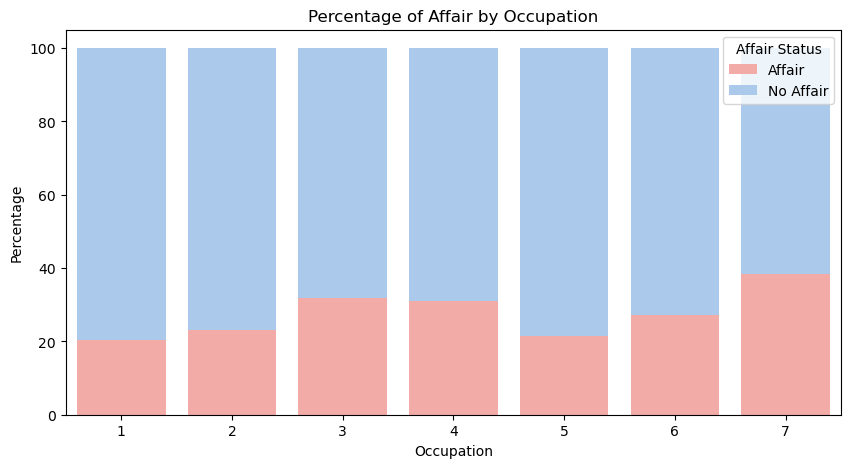

In [34]:
occupation_order = sorted(occupation_df['occupation'].unique())

counts = occupation_df.groupby(['occupation', 'affairs']).size().unstack(fill_value=0)
counts['total'] = counts.sum(axis=1)
counts['percentage_affair'] = (counts[1] / counts['total']) * 100
counts['percentage_no_affair'] = (counts[0] / counts['total']) * 100

pastel_red = sns.color_palette('pastel')[3] 
pastel_blue = sns.color_palette('pastel')[0] 

plt.figure(figsize=(10, 5))
sns.barplot(x='occupation', y='percentage_affair', data=counts.reset_index(), order=occupation_order, color=pastel_red, label="Affair")
sns.barplot(x='occupation', y='percentage_no_affair', data=counts.reset_index(), order=occupation_order, color=pastel_blue, label="No Affair", bottom=counts['percentage_affair'])
plt.title("Percentage of Affair by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Percentage")
plt.legend(title="Affair Status")
plt.show()


In [35]:
counts['percentage_affair']

occupation
1    20.353982
2    23.076923
3    31.914894
4    30.882353
5    21.568627
6    27.272727
7    38.461538
Name: percentage_affair, dtype: float64

<div dir="rtl">
    
    באיור ניתן לראות שבכל רמה סוציואקונומית, רוב האנשים אינם מנהלים רומן.
    אין מגמה ברורה שממנה אפשר להסיק על מצב סוציואקונומי שבו ינהלו יותר רומנים.
    אבל כשמסתכלים על שני קצוות האוכלוסייה נראה שב 1 - רמה סוציואקונומית נמוכה, מנהלים פחות רומנים מאשר ב 7 - רמה סוציואקונימית הכי גבוהה.
    כלומר, האנשים העשירים מנהלים יותר רומנים.

![Alt Text](https://raw.githubusercontent.com/noamshayer/DataAnalistProject/main/giphy.webp)

<div dir="rtl">
    
    תודה על ההקשבה!

### The prediction model

<div dir="rtl">
    
## הצגת מודל חיזוי, דיוקו וסדר חשיבות הפיצ'רים       
    לאחר שחקרנו חמישה פרמטרים ובדקנו את הקשר שלהם ביחס לניהול רומן, נבצע מודל חיזוי המסתמך עליהם. 

In [36]:
features2 = ['gender','children', 'rating','yearsmarried','religiousness']
X2 = yes_no_affairs[features2]
y2 = yes_no_affairs['affairs']
X2_train, X2_test, y2_train, y2_test = sk.model_selection.train_test_split(X2, y2, test_size=0.3, random_state=1) 

In [37]:
my_model2 =sk.tree.DecisionTreeClassifier(criterion="gini")
my_model2.fit(X2_train,y2_train)

DecisionTreeClassifier()

In [38]:
feature_importances2 = pd.DataFrame(my_model2.feature_importances_,
                                   index = X2.columns[:10],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False,)
feature_importances2.head()

,importance
yearsmarried,0.304314
religiousness,0.239473
rating,0.200419
gender,0.184973
children,0.070821


In [39]:
pred2 = my_model2.predict(X2_test)
acc2 = sk.metrics.accuracy_score(pred2, y2_test)
print("The accuracy is:",acc2)

The accuracy is: 0.6850828729281768


<div dir="rtl">
    
    קיבלנו שהדיוק על חמשת הפרמטרים הינו 0.696. עתה נבצע חיזוי עבור 3 התכונות שנמצאות בראש הרשימה ונראה אם יחול שינוי בדיוק.
    נשים לב כי שלושת הפרמטרים שנמצאים בראש הרשימה הם גם אלו שמצאנו שבאמת משפיעים על ניהול הרומן. לעומת השניים האחרים שהצלחנו להסיק עליהם מהגרפים שאין להם הרבה השפעה על ניהול הרומן, דבר הבא לידי ביטוי במודל החיזוי.

In [40]:
features = [ 'rating','yearsmarried','religiousness']
X = yes_no_affairs[features]
y = yes_no_affairs['affairs']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [41]:
my_model =sk.tree.DecisionTreeClassifier(criterion="gini")
my_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
feature_importances = pd.DataFrame(my_model.feature_importances_,
                                   index = X.columns[:3],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False,)
feature_importances.head()

,importance
yearsmarried,0.404517
rating,0.310887
religiousness,0.284596


In [43]:
pred = my_model.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)
print("The accuracy is:",acc)

The accuracy is: 0.7734806629834254


<div dir="rtl">
    
    אנו רואים שאכן חל שינוי בדיוק והוא גדל ל 0.773